# MNIST Trial 2: Creating shifted copies of the images and using them to train models

In [1]:
# loading the model
from sklearn.datasets import fetch_openml
MNIST = fetch_openml("mnist_784", version=1, as_frame=False)

In [3]:
MNIST.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
X, y = MNIST['data'], MNIST['target']

In [5]:
import numpy as np

In [6]:
y = y.astype(np.uint8)

In [7]:
X_train, X_test, y_train, y_test = X[:60_000], X[60_000:], y[:60_000], y[60_000:]

## Creating a fucntion to shift the image

In [10]:
from scipy.ndimage.interpolation import shift
from matplotlib import pyplot as plt

In [9]:
some_digit = X_train[0]

In [11]:
# a function to draw the digit
def  draw_digit(digit):
    digit_image = np.reshape(digit, (28, 28))
    plt.imshow(digit_image, cmap='binary')
    plt.show()

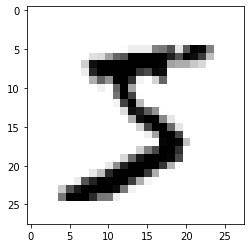

In [12]:
draw_digit(some_digit)

In [29]:
def make_shifts(digit, units_to_shift):
    # function for making the shifts
    digit_image = np.reshape(digit, (28, 28))
    shifted_digit = shift(digit_image, units_to_shift)
    return shifted_digit.reshape(784)

In [33]:
# making the shifts
X_train_shifted_right = np.apply_along_axis(make_shifts, 1, X_train, units_to_shift=[0, 1])
X_train_shifted_left = np.apply_along_axis(make_shifts, 1, X_train, units_to_shift=[0, -1])
X_train_shifted_down = np.apply_along_axis(make_shifts, 1, X_train, units_to_shift=[1, 0])
X_train_shifted_up = np.apply_along_axis(make_shifts, 1, X_train, units_to_shift=[-1, 0])

In [37]:
# combining all the datasets
X_train_updated = np.concatenate((X_train_shifted_right, 
                                  X_train_shifted_left, 
                                  X_train_shifted_down, 
                                  X_train_shifted_up), axis=0)
y_train_updated = np.concatenate((y_train,
                                  y_train,
                                  y_train,
                                  y_train), axis=0)